### Import libraries

In [1]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statistics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

### Train the model with a CNN with augmented dataset

In [2]:
size=180
TRAINING_DIR = os.path.join('C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy','training')
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=3,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size=40,
                                                   class_mode='binary',
                                                   target_size=(size,size))

VALIDATION_DIR = os.path.join('C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy', 'validation')
validation_datagen = ImageDataGenerator(rescale=1/255)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size=40,
                                                             class_mode='binary',
                                                             target_size=(size,size))



Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
tf.random.set_seed(79)

#model = tf.keras.applications.DenseNet169(include_top=True,weights=None,input_shape=(35,35,3),classes=1)
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='linear', input_shape=(size,size, 3)),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3)),#activation='linear'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),  activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='linear'),
    #tf.keras.layers.Dropout(rate=0.05),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='linear'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1200, activation='linear'),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(38, activation='linear'),
    tf.keras.layers.Dropout(rate=0.1),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
      ])



opt = keras.optimizers.Adam(learning_rate=0.000004)

early_stopping_cb=keras.callbacks.EarlyStopping(patience=210,restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()
#pd.set_option('display.max_rows', 10)

history = model.fit_generator(train_generator,
                              epochs=7000,
                              verbose=1,
                              validation_data=validation_generator,callbacks=[early_stopping_cb])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
activation (Activation)      (None, 87, 87, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0

C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7000
5/5 [==============================] - 11s 867ms/step - loss: 0.7082 - accuracy: 0.4635 - val_loss: 0.6964 - val_accuracy: 0.3500
Epoch 2/7000
5/5 [==============================] - 2s 439ms/step - loss: 0.7022 - accuracy: 0.4271 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/7000
5/5 [==============================] - 2s 431ms/step - loss: 0.6971 - accuracy: 0.5104 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 4/7000
5/5 [==============================] - 2s 396ms/step - loss: 0.6913 - accuracy: 0.4896 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 5/7000
5/5 [==============================] - 2s 476ms/step - loss: 0.6836 - accuracy: 0.5260 - val_loss: 0.6844 - val_accuracy: 0.5000
Epoch 6/7000
5/5 [==============================] - 2s 473ms/step - loss: 0.6823 - accuracy: 0.5365 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 7/7000
5/5 [==============================] - 2s 439ms/step - loss: 0.6852 - accuracy: 0.5312 - val_loss: 0.6792 - val_accuracy: 0.5000
Epoch

5/5 [==============================] - 2s 449ms/step - loss: 0.5631 - accuracy: 0.7604 - val_loss: 0.5685 - val_accuracy: 0.7000
Epoch 59/7000
5/5 [==============================] - 2s 499ms/step - loss: 0.5699 - accuracy: 0.7500 - val_loss: 0.5663 - val_accuracy: 0.7000
Epoch 60/7000
5/5 [==============================] - 2s 410ms/step - loss: 0.5842 - accuracy: 0.7344 - val_loss: 0.5644 - val_accuracy: 0.7000
Epoch 61/7000
5/5 [==============================] - 2s 421ms/step - loss: 0.5674 - accuracy: 0.7656 - val_loss: 0.5633 - val_accuracy: 0.7000
Epoch 62/7000
5/5 [==============================] - 3s 556ms/step - loss: 0.5740 - accuracy: 0.7552 - val_loss: 0.5609 - val_accuracy: 0.7000
Epoch 63/7000
5/5 [==============================] - 2s 420ms/step - loss: 0.5523 - accuracy: 0.7708 - val_loss: 0.5586 - val_accuracy: 0.7000
Epoch 64/7000
5/5 [==============================] - 2s 402ms/step - loss: 0.5588 - accuracy: 0.7708 - val_loss: 0.5587 - val_accuracy: 0.6500
Epoch 65/7000

5/5 [==============================] - 3s 493ms/step - loss: 0.5025 - accuracy: 0.7656 - val_loss: 0.5036 - val_accuracy: 0.7000
Epoch 116/7000
5/5 [==============================] - 2s 487ms/step - loss: 0.5100 - accuracy: 0.7760 - val_loss: 0.5073 - val_accuracy: 0.7000
Epoch 117/7000
5/5 [==============================] - 2s 399ms/step - loss: 0.5021 - accuracy: 0.7656 - val_loss: 0.5109 - val_accuracy: 0.7000
Epoch 118/7000
5/5 [==============================] - 2s 409ms/step - loss: 0.4975 - accuracy: 0.7917 - val_loss: 0.5063 - val_accuracy: 0.7000
Epoch 119/7000
5/5 [==============================] - 2s 422ms/step - loss: 0.4924 - accuracy: 0.8125 - val_loss: 0.5018 - val_accuracy: 0.7500
Epoch 120/7000
5/5 [==============================] - 2s 407ms/step - loss: 0.5057 - accuracy: 0.7812 - val_loss: 0.4951 - val_accuracy: 0.7000
Epoch 121/7000
5/5 [==============================] - 3s 490ms/step - loss: 0.5002 - accuracy: 0.7812 - val_loss: 0.4953 - val_accuracy: 0.7000
Epoch 1

Epoch 172/7000
5/5 [==============================] - 2s 419ms/step - loss: 0.4696 - accuracy: 0.7812 - val_loss: 0.4789 - val_accuracy: 0.8000
Epoch 173/7000
5/5 [==============================] - 2s 401ms/step - loss: 0.4673 - accuracy: 0.7656 - val_loss: 0.4775 - val_accuracy: 0.8000
Epoch 174/7000
5/5 [==============================] - 2s 433ms/step - loss: 0.4817 - accuracy: 0.7917 - val_loss: 0.4768 - val_accuracy: 0.8000
Epoch 175/7000
5/5 [==============================] - 2s 396ms/step - loss: 0.4670 - accuracy: 0.7969 - val_loss: 0.4717 - val_accuracy: 0.7500
Epoch 176/7000
5/5 [==============================] - 2s 431ms/step - loss: 0.4824 - accuracy: 0.7760 - val_loss: 0.4741 - val_accuracy: 0.8000
Epoch 177/7000
5/5 [==============================] - 2s 475ms/step - loss: 0.4955 - accuracy: 0.7656 - val_loss: 0.4745 - val_accuracy: 0.8000
Epoch 178/7000
5/5 [==============================] - 2s 371ms/step - loss: 0.4449 - accuracy: 0.8125 - val_loss: 0.4808 - val_accuracy:

Epoch 229/7000
5/5 [==============================] - 2s 465ms/step - loss: 0.4686 - accuracy: 0.7865 - val_loss: 0.4750 - val_accuracy: 0.8000
Epoch 230/7000
5/5 [==============================] - 2s 452ms/step - loss: 0.4510 - accuracy: 0.7969 - val_loss: 0.4741 - val_accuracy: 0.8000
Epoch 231/7000
5/5 [==============================] - 2s 483ms/step - loss: 0.4509 - accuracy: 0.8021 - val_loss: 0.4666 - val_accuracy: 0.8000
Epoch 232/7000
5/5 [==============================] - 2s 440ms/step - loss: 0.4489 - accuracy: 0.8021 - val_loss: 0.4678 - val_accuracy: 0.8000
Epoch 233/7000
5/5 [==============================] - 2s 396ms/step - loss: 0.4294 - accuracy: 0.8177 - val_loss: 0.4658 - val_accuracy: 0.8000
Epoch 234/7000
5/5 [==============================] - 2s 404ms/step - loss: 0.4868 - accuracy: 0.7812 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 235/7000
5/5 [==============================] - 2s 419ms/step - loss: 0.4668 - accuracy: 0.7865 - val_loss: 0.4534 - val_accuracy:

Epoch 286/7000
5/5 [==============================] - 2s 423ms/step - loss: 0.4680 - accuracy: 0.8125 - val_loss: 0.4568 - val_accuracy: 0.8000
Epoch 287/7000
5/5 [==============================] - 2s 423ms/step - loss: 0.4580 - accuracy: 0.8125 - val_loss: 0.4508 - val_accuracy: 0.8000
Epoch 288/7000
5/5 [==============================] - 2s 426ms/step - loss: 0.4432 - accuracy: 0.8281 - val_loss: 0.4538 - val_accuracy: 0.8000
Epoch 289/7000
5/5 [==============================] - 2s 404ms/step - loss: 0.4621 - accuracy: 0.7760 - val_loss: 0.4520 - val_accuracy: 0.8000
Epoch 290/7000
5/5 [==============================] - 3s 487ms/step - loss: 0.4521 - accuracy: 0.8021 - val_loss: 0.4487 - val_accuracy: 0.8000
Epoch 291/7000
5/5 [==============================] - 2s 421ms/step - loss: 0.4450 - accuracy: 0.8021 - val_loss: 0.4522 - val_accuracy: 0.8000
Epoch 292/7000
5/5 [==============================] - 2s 391ms/step - loss: 0.4502 - accuracy: 0.7917 - val_loss: 0.4491 - val_accuracy:

Epoch 343/7000
5/5 [==============================] - 2s 432ms/step - loss: 0.4418 - accuracy: 0.8021 - val_loss: 0.4430 - val_accuracy: 0.8000
Epoch 344/7000
5/5 [==============================] - 3s 509ms/step - loss: 0.4356 - accuracy: 0.8021 - val_loss: 0.4429 - val_accuracy: 0.8000
Epoch 345/7000
5/5 [==============================] - 2s 429ms/step - loss: 0.4252 - accuracy: 0.8385 - val_loss: 0.4504 - val_accuracy: 0.8000
Epoch 346/7000
5/5 [==============================] - 2s 449ms/step - loss: 0.4304 - accuracy: 0.8021 - val_loss: 0.4415 - val_accuracy: 0.8000
Epoch 347/7000
5/5 [==============================] - 2s 419ms/step - loss: 0.4278 - accuracy: 0.8021 - val_loss: 0.4387 - val_accuracy: 0.8000
Epoch 348/7000
5/5 [==============================] - 3s 455ms/step - loss: 0.4279 - accuracy: 0.8229 - val_loss: 0.4396 - val_accuracy: 0.8000
Epoch 349/7000
5/5 [==============================] - 2s 456ms/step - loss: 0.4245 - accuracy: 0.8177 - val_loss: 0.4382 - val_accuracy:

Epoch 400/7000
5/5 [==============================] - 2s 468ms/step - loss: 0.4334 - accuracy: 0.8177 - val_loss: 0.4268 - val_accuracy: 0.8000
Epoch 401/7000
5/5 [==============================] - 2s 436ms/step - loss: 0.4147 - accuracy: 0.8021 - val_loss: 0.4182 - val_accuracy: 0.8500
Epoch 402/7000
5/5 [==============================] - 2s 471ms/step - loss: 0.4128 - accuracy: 0.8438 - val_loss: 0.4144 - val_accuracy: 0.8500
Epoch 403/7000
5/5 [==============================] - 2s 390ms/step - loss: 0.4195 - accuracy: 0.7812 - val_loss: 0.4201 - val_accuracy: 0.8500
Epoch 404/7000
5/5 [==============================] - 3s 444ms/step - loss: 0.4315 - accuracy: 0.8073 - val_loss: 0.4266 - val_accuracy: 0.8000
Epoch 405/7000
5/5 [==============================] - 2s 444ms/step - loss: 0.4173 - accuracy: 0.8333 - val_loss: 0.4259 - val_accuracy: 0.8000
Epoch 406/7000
5/5 [==============================] - 2s 461ms/step - loss: 0.4019 - accuracy: 0.8385 - val_loss: 0.4300 - val_accuracy:

Epoch 457/7000
5/5 [==============================] - 2s 402ms/step - loss: 0.4133 - accuracy: 0.7917 - val_loss: 0.4198 - val_accuracy: 0.8500
Epoch 458/7000
5/5 [==============================] - 2s 464ms/step - loss: 0.3876 - accuracy: 0.8229 - val_loss: 0.4235 - val_accuracy: 0.8500
Epoch 459/7000
5/5 [==============================] - 2s 451ms/step - loss: 0.4107 - accuracy: 0.8125 - val_loss: 0.4163 - val_accuracy: 0.8500
Epoch 460/7000
5/5 [==============================] - 3s 501ms/step - loss: 0.4180 - accuracy: 0.8229 - val_loss: 0.4111 - val_accuracy: 0.8500
Epoch 461/7000
5/5 [==============================] - 2s 408ms/step - loss: 0.3923 - accuracy: 0.8229 - val_loss: 0.4151 - val_accuracy: 0.8500
Epoch 462/7000
5/5 [==============================] - 2s 427ms/step - loss: 0.4217 - accuracy: 0.8021 - val_loss: 0.4183 - val_accuracy: 0.8500
Epoch 463/7000
5/5 [==============================] - 3s 602ms/step - loss: 0.4137 - accuracy: 0.8021 - val_loss: 0.4221 - val_accuracy:

Epoch 514/7000
5/5 [==============================] - 2s 438ms/step - loss: 0.4045 - accuracy: 0.8490 - val_loss: 0.3905 - val_accuracy: 0.8500
Epoch 515/7000
5/5 [==============================] - 2s 398ms/step - loss: 0.4050 - accuracy: 0.8125 - val_loss: 0.4025 - val_accuracy: 0.8500
Epoch 516/7000
5/5 [==============================] - 2s 406ms/step - loss: 0.4121 - accuracy: 0.8073 - val_loss: 0.4064 - val_accuracy: 0.8500
Epoch 517/7000
5/5 [==============================] - 2s 439ms/step - loss: 0.4155 - accuracy: 0.8229 - val_loss: 0.4045 - val_accuracy: 0.8500
Epoch 518/7000
5/5 [==============================] - 2s 413ms/step - loss: 0.4130 - accuracy: 0.8073 - val_loss: 0.4041 - val_accuracy: 0.8500
Epoch 519/7000
5/5 [==============================] - 3s 442ms/step - loss: 0.4181 - accuracy: 0.8073 - val_loss: 0.4062 - val_accuracy: 0.8500
Epoch 520/7000
5/5 [==============================] - 2s 469ms/step - loss: 0.4221 - accuracy: 0.8281 - val_loss: 0.4082 - val_accuracy:

Epoch 571/7000
5/5 [==============================] - 2s 432ms/step - loss: 0.3893 - accuracy: 0.8281 - val_loss: 0.3914 - val_accuracy: 0.8500
Epoch 572/7000
5/5 [==============================] - 2s 423ms/step - loss: 0.4038 - accuracy: 0.8281 - val_loss: 0.4066 - val_accuracy: 0.8500
Epoch 573/7000
5/5 [==============================] - 2s 446ms/step - loss: 0.4141 - accuracy: 0.8021 - val_loss: 0.4219 - val_accuracy: 0.8500
Epoch 574/7000
5/5 [==============================] - 2s 456ms/step - loss: 0.3856 - accuracy: 0.8385 - val_loss: 0.4123 - val_accuracy: 0.8500
Epoch 575/7000
5/5 [==============================] - 3s 554ms/step - loss: 0.4090 - accuracy: 0.7969 - val_loss: 0.4015 - val_accuracy: 0.8500
Epoch 576/7000
5/5 [==============================] - 2s 397ms/step - loss: 0.4053 - accuracy: 0.8438 - val_loss: 0.3948 - val_accuracy: 0.8500
Epoch 577/7000
5/5 [==============================] - 2s 481ms/step - loss: 0.3982 - accuracy: 0.8333 - val_loss: 0.3973 - val_accuracy:

Epoch 628/7000
5/5 [==============================] - 3s 499ms/step - loss: 0.3652 - accuracy: 0.8490 - val_loss: 0.3931 - val_accuracy: 0.8500
Epoch 629/7000
5/5 [==============================] - 2s 457ms/step - loss: 0.4302 - accuracy: 0.8021 - val_loss: 0.4026 - val_accuracy: 0.8500
Epoch 630/7000
5/5 [==============================] - 2s 434ms/step - loss: 0.3799 - accuracy: 0.8438 - val_loss: 0.3993 - val_accuracy: 0.8500
Epoch 631/7000
5/5 [==============================] - 2s 442ms/step - loss: 0.4075 - accuracy: 0.8073 - val_loss: 0.3978 - val_accuracy: 0.8500
Epoch 632/7000
5/5 [==============================] - 2s 384ms/step - loss: 0.3905 - accuracy: 0.8385 - val_loss: 0.3830 - val_accuracy: 0.8500
Epoch 633/7000
5/5 [==============================] - 2s 500ms/step - loss: 0.4182 - accuracy: 0.8229 - val_loss: 0.3787 - val_accuracy: 0.8500
Epoch 634/7000
5/5 [==============================] - 2s 442ms/step - loss: 0.3903 - accuracy: 0.8229 - val_loss: 0.3805 - val_accuracy:

Epoch 685/7000
5/5 [==============================] - 2s 444ms/step - loss: 0.3771 - accuracy: 0.8594 - val_loss: 0.3716 - val_accuracy: 0.8500
Epoch 686/7000
5/5 [==============================] - 2s 426ms/step - loss: 0.3863 - accuracy: 0.8490 - val_loss: 0.3688 - val_accuracy: 0.8500
Epoch 687/7000
5/5 [==============================] - 2s 438ms/step - loss: 0.3831 - accuracy: 0.8646 - val_loss: 0.3685 - val_accuracy: 0.8500
Epoch 688/7000
5/5 [==============================] - 2s 416ms/step - loss: 0.3718 - accuracy: 0.8594 - val_loss: 0.3790 - val_accuracy: 0.8500
Epoch 689/7000
5/5 [==============================] - 2s 461ms/step - loss: 0.3970 - accuracy: 0.8594 - val_loss: 0.3873 - val_accuracy: 0.8500
Epoch 690/7000
5/5 [==============================] - 2s 470ms/step - loss: 0.3829 - accuracy: 0.8177 - val_loss: 0.3844 - val_accuracy: 0.8500
Epoch 691/7000
5/5 [==============================] - 2s 458ms/step - loss: 0.3882 - accuracy: 0.8177 - val_loss: 0.3853 - val_accuracy:

Epoch 742/7000
5/5 [==============================] - 2s 443ms/step - loss: 0.3807 - accuracy: 0.8594 - val_loss: 0.3950 - val_accuracy: 0.8500
Epoch 743/7000
5/5 [==============================] - 3s 441ms/step - loss: 0.3880 - accuracy: 0.8438 - val_loss: 0.3833 - val_accuracy: 0.8500
Epoch 744/7000
5/5 [==============================] - 2s 485ms/step - loss: 0.3748 - accuracy: 0.8438 - val_loss: 0.3894 - val_accuracy: 0.8500
Epoch 745/7000
5/5 [==============================] - 2s 434ms/step - loss: 0.3717 - accuracy: 0.8333 - val_loss: 0.3843 - val_accuracy: 0.8500
Epoch 746/7000
5/5 [==============================] - 2s 433ms/step - loss: 0.4000 - accuracy: 0.8177 - val_loss: 0.3838 - val_accuracy: 0.8500
Epoch 747/7000
5/5 [==============================] - 2s 399ms/step - loss: 0.3997 - accuracy: 0.8281 - val_loss: 0.3838 - val_accuracy: 0.8500
Epoch 748/7000
5/5 [==============================] - 2s 462ms/step - loss: 0.3696 - accuracy: 0.8646 - val_loss: 0.3824 - val_accuracy:

Epoch 799/7000
5/5 [==============================] - 3s 506ms/step - loss: 0.3806 - accuracy: 0.8490 - val_loss: 0.3773 - val_accuracy: 0.8500
Epoch 800/7000
5/5 [==============================] - 3s 537ms/step - loss: 0.3553 - accuracy: 0.8385 - val_loss: 0.3710 - val_accuracy: 0.8500
Epoch 801/7000
5/5 [==============================] - 2s 445ms/step - loss: 0.3916 - accuracy: 0.8490 - val_loss: 0.3742 - val_accuracy: 0.8500
Epoch 802/7000
5/5 [==============================] - 2s 470ms/step - loss: 0.3538 - accuracy: 0.8490 - val_loss: 0.3819 - val_accuracy: 0.8500
Epoch 803/7000
5/5 [==============================] - 2s 468ms/step - loss: 0.3748 - accuracy: 0.8385 - val_loss: 0.3813 - val_accuracy: 0.8500
Epoch 804/7000
5/5 [==============================] - 2s 423ms/step - loss: 0.3786 - accuracy: 0.8594 - val_loss: 0.3738 - val_accuracy: 0.8500
Epoch 805/7000
5/5 [==============================] - 3s 479ms/step - loss: 0.3665 - accuracy: 0.8177 - val_loss: 0.3694 - val_accuracy:

Epoch 856/7000
5/5 [==============================] - 2s 447ms/step - loss: 0.3712 - accuracy: 0.8646 - val_loss: 0.3615 - val_accuracy: 0.8500
Epoch 857/7000
5/5 [==============================] - 2s 431ms/step - loss: 0.3713 - accuracy: 0.8490 - val_loss: 0.3619 - val_accuracy: 0.8500
Epoch 858/7000
5/5 [==============================] - 2s 428ms/step - loss: 0.3564 - accuracy: 0.8385 - val_loss: 0.3769 - val_accuracy: 0.8500
Epoch 859/7000
5/5 [==============================] - 2s 426ms/step - loss: 0.3554 - accuracy: 0.8438 - val_loss: 0.3768 - val_accuracy: 0.8500
Epoch 860/7000
5/5 [==============================] - 2s 450ms/step - loss: 0.3751 - accuracy: 0.8490 - val_loss: 0.3751 - val_accuracy: 0.8500
Epoch 861/7000
5/5 [==============================] - 2s 457ms/step - loss: 0.3385 - accuracy: 0.8542 - val_loss: 0.3689 - val_accuracy: 0.8500
Epoch 862/7000
5/5 [==============================] - 2s 462ms/step - loss: 0.3682 - accuracy: 0.8385 - val_loss: 0.3611 - val_accuracy:

Epoch 913/7000
5/5 [==============================] - 2s 380ms/step - loss: 0.3404 - accuracy: 0.8594 - val_loss: 0.3590 - val_accuracy: 0.8500
Epoch 914/7000
5/5 [==============================] - 2s 427ms/step - loss: 0.4078 - accuracy: 0.8125 - val_loss: 0.3553 - val_accuracy: 0.8500
Epoch 915/7000
5/5 [==============================] - 2s 416ms/step - loss: 0.3466 - accuracy: 0.8594 - val_loss: 0.3567 - val_accuracy: 0.8500
Epoch 916/7000
5/5 [==============================] - 2s 431ms/step - loss: 0.3645 - accuracy: 0.8177 - val_loss: 0.3603 - val_accuracy: 0.8500
Epoch 917/7000
5/5 [==============================] - 2s 464ms/step - loss: 0.3595 - accuracy: 0.8542 - val_loss: 0.3666 - val_accuracy: 0.8500
Epoch 918/7000
5/5 [==============================] - 2s 379ms/step - loss: 0.3498 - accuracy: 0.8542 - val_loss: 0.3772 - val_accuracy: 0.8500
Epoch 919/7000
5/5 [==============================] - 2s 378ms/step - loss: 0.3513 - accuracy: 0.8646 - val_loss: 0.3720 - val_accuracy:

Epoch 970/7000
5/5 [==============================] - 2s 385ms/step - loss: 0.3710 - accuracy: 0.8646 - val_loss: 0.3427 - val_accuracy: 0.8500
Epoch 971/7000
5/5 [==============================] - 2s 411ms/step - loss: 0.3694 - accuracy: 0.8490 - val_loss: 0.3436 - val_accuracy: 0.8500
Epoch 972/7000
5/5 [==============================] - 3s 502ms/step - loss: 0.3645 - accuracy: 0.8490 - val_loss: 0.3605 - val_accuracy: 0.8500
Epoch 973/7000
5/5 [==============================] - 2s 438ms/step - loss: 0.3987 - accuracy: 0.8438 - val_loss: 0.3603 - val_accuracy: 0.8500
Epoch 974/7000
5/5 [==============================] - 2s 428ms/step - loss: 0.3356 - accuracy: 0.8646 - val_loss: 0.3642 - val_accuracy: 0.8500
Epoch 975/7000
5/5 [==============================] - 2s 417ms/step - loss: 0.3593 - accuracy: 0.8542 - val_loss: 0.3680 - val_accuracy: 0.8500
Epoch 976/7000
5/5 [==============================] - 2s 434ms/step - loss: 0.3555 - accuracy: 0.8698 - val_loss: 0.3589 - val_accuracy:

Epoch 1027/7000
5/5 [==============================] - 2s 425ms/step - loss: 0.3569 - accuracy: 0.8646 - val_loss: 0.3531 - val_accuracy: 0.8500
Epoch 1028/7000
5/5 [==============================] - 2s 428ms/step - loss: 0.3254 - accuracy: 0.8698 - val_loss: 0.3453 - val_accuracy: 0.8500
Epoch 1029/7000
5/5 [==============================] - 2s 456ms/step - loss: 0.3380 - accuracy: 0.8802 - val_loss: 0.3406 - val_accuracy: 0.8500
Epoch 1030/7000
5/5 [==============================] - 2s 442ms/step - loss: 0.3587 - accuracy: 0.8385 - val_loss: 0.3601 - val_accuracy: 0.8500
Epoch 1031/7000
5/5 [==============================] - 2s 414ms/step - loss: 0.3444 - accuracy: 0.8594 - val_loss: 0.3674 - val_accuracy: 0.8500
Epoch 1032/7000
5/5 [==============================] - 2s 450ms/step - loss: 0.3693 - accuracy: 0.8438 - val_loss: 0.3642 - val_accuracy: 0.8500
Epoch 1033/7000
5/5 [==============================] - 2s 420ms/step - loss: 0.3345 - accuracy: 0.8698 - val_loss: 0.3660 - val_ac

5/5 [==============================] - 2s 455ms/step - loss: 0.3305 - accuracy: 0.8698 - val_loss: 0.3773 - val_accuracy: 0.8500
Epoch 1084/7000
5/5 [==============================] - 2s 397ms/step - loss: 0.3374 - accuracy: 0.8698 - val_loss: 0.3699 - val_accuracy: 0.8500
Epoch 1085/7000
5/5 [==============================] - 2s 496ms/step - loss: 0.3486 - accuracy: 0.8542 - val_loss: 0.3558 - val_accuracy: 0.8500
Epoch 1086/7000
5/5 [==============================] - 2s 409ms/step - loss: 0.3612 - accuracy: 0.8594 - val_loss: 0.3474 - val_accuracy: 0.8500
Epoch 1087/7000
5/5 [==============================] - 2s 501ms/step - loss: 0.3394 - accuracy: 0.8594 - val_loss: 0.3587 - val_accuracy: 0.8500
Epoch 1088/7000
5/5 [==============================] - 3s 495ms/step - loss: 0.3423 - accuracy: 0.8438 - val_loss: 0.3722 - val_accuracy: 0.8500
Epoch 1089/7000
5/5 [==============================] - 3s 467ms/step - loss: 0.3308 - accuracy: 0.8594 - val_loss: 0.3733 - val_accuracy: 0.8500
E

5/5 [==============================] - 3s 582ms/step - loss: 0.3417 - accuracy: 0.8646 - val_loss: 0.3654 - val_accuracy: 0.8500
Epoch 1140/7000
5/5 [==============================] - 2s 459ms/step - loss: 0.3541 - accuracy: 0.8750 - val_loss: 0.3627 - val_accuracy: 0.8500
Epoch 1141/7000
5/5 [==============================] - 2s 449ms/step - loss: 0.3308 - accuracy: 0.8594 - val_loss: 0.3418 - val_accuracy: 0.8500
Epoch 1142/7000
5/5 [==============================] - 2s 475ms/step - loss: 0.3379 - accuracy: 0.8490 - val_loss: 0.3472 - val_accuracy: 0.8500
Epoch 1143/7000
5/5 [==============================] - 2s 480ms/step - loss: 0.3434 - accuracy: 0.8438 - val_loss: 0.3574 - val_accuracy: 0.8500
Epoch 1144/7000
5/5 [==============================] - 3s 574ms/step - loss: 0.3418 - accuracy: 0.8750 - val_loss: 0.3440 - val_accuracy: 0.8500
Epoch 1145/7000
5/5 [==============================] - 2s 403ms/step - loss: 0.3424 - accuracy: 0.8490 - val_loss: 0.3514 - val_accuracy: 0.8500
E

5/5 [==============================] - 2s 432ms/step - loss: 0.3446 - accuracy: 0.8646 - val_loss: 0.3448 - val_accuracy: 0.8500
Epoch 1196/7000
5/5 [==============================] - 2s 401ms/step - loss: 0.3279 - accuracy: 0.8698 - val_loss: 0.3508 - val_accuracy: 0.8500
Epoch 1197/7000
5/5 [==============================] - 2s 396ms/step - loss: 0.3634 - accuracy: 0.8333 - val_loss: 0.3744 - val_accuracy: 0.8500
Epoch 1198/7000
5/5 [==============================] - 2s 426ms/step - loss: 0.3399 - accuracy: 0.8802 - val_loss: 0.3683 - val_accuracy: 0.8500
Epoch 1199/7000
5/5 [==============================] - 2s 407ms/step - loss: 0.3323 - accuracy: 0.8698 - val_loss: 0.3576 - val_accuracy: 0.8500
Epoch 1200/7000
5/5 [==============================] - 2s 401ms/step - loss: 0.3191 - accuracy: 0.8750 - val_loss: 0.3562 - val_accuracy: 0.8500
Epoch 1201/7000
5/5 [==============================] - 2s 412ms/step - loss: 0.3358 - accuracy: 0.8594 - val_loss: 0.3600 - val_accuracy: 0.8500
E

5/5 [==============================] - 3s 504ms/step - loss: 0.3084 - accuracy: 0.8802 - val_loss: 0.3907 - val_accuracy: 0.8500
Epoch 1252/7000
5/5 [==============================] - 3s 462ms/step - loss: 0.3356 - accuracy: 0.8646 - val_loss: 0.3711 - val_accuracy: 0.8500
Epoch 1253/7000
5/5 [==============================] - 3s 498ms/step - loss: 0.3728 - accuracy: 0.8802 - val_loss: 0.3537 - val_accuracy: 0.8500
Epoch 1254/7000
5/5 [==============================] - 2s 433ms/step - loss: 0.3471 - accuracy: 0.8594 - val_loss: 0.3496 - val_accuracy: 0.8500
Epoch 1255/7000
5/5 [==============================] - 2s 429ms/step - loss: 0.3290 - accuracy: 0.8802 - val_loss: 0.3618 - val_accuracy: 0.8500
Epoch 1256/7000
5/5 [==============================] - 2s 452ms/step - loss: 0.3237 - accuracy: 0.8750 - val_loss: 0.3553 - val_accuracy: 0.8500
Epoch 1257/7000
5/5 [==============================] - 3s 511ms/step - loss: 0.3620 - accuracy: 0.8438 - val_loss: 0.3482 - val_accuracy: 0.8500
E

5/5 [==============================] - 2s 386ms/step - loss: 0.3291 - accuracy: 0.8594 - val_loss: 0.3497 - val_accuracy: 0.8500
Epoch 1308/7000
5/5 [==============================] - 2s 445ms/step - loss: 0.3544 - accuracy: 0.8542 - val_loss: 0.3404 - val_accuracy: 0.8500
Epoch 1309/7000
5/5 [==============================] - 3s 537ms/step - loss: 0.3291 - accuracy: 0.8750 - val_loss: 0.3590 - val_accuracy: 0.8500
Epoch 1310/7000
5/5 [==============================] - 2s 399ms/step - loss: 0.3330 - accuracy: 0.8646 - val_loss: 0.3650 - val_accuracy: 0.8500
Epoch 1311/7000
5/5 [==============================] - 2s 468ms/step - loss: 0.3323 - accuracy: 0.8646 - val_loss: 0.3552 - val_accuracy: 0.8500
Epoch 1312/7000
5/5 [==============================] - 2s 436ms/step - loss: 0.3412 - accuracy: 0.8750 - val_loss: 0.3451 - val_accuracy: 0.8500
Epoch 1313/7000
5/5 [==============================] - 2s 456ms/step - loss: 0.3053 - accuracy: 0.8958 - val_loss: 0.3334 - val_accuracy: 0.8500
E

5/5 [==============================] - 2s 434ms/step - loss: 0.3596 - accuracy: 0.8490 - val_loss: 0.3276 - val_accuracy: 0.9000
Epoch 1364/7000
5/5 [==============================] - 2s 423ms/step - loss: 0.3531 - accuracy: 0.8542 - val_loss: 0.3276 - val_accuracy: 0.9000
Epoch 1365/7000
5/5 [==============================] - 2s 460ms/step - loss: 0.3292 - accuracy: 0.8750 - val_loss: 0.3548 - val_accuracy: 0.8500
Epoch 1366/7000
5/5 [==============================] - 2s 443ms/step - loss: 0.3579 - accuracy: 0.8594 - val_loss: 0.3753 - val_accuracy: 0.8500
Epoch 1367/7000
5/5 [==============================] - 2s 416ms/step - loss: 0.3168 - accuracy: 0.8802 - val_loss: 0.3651 - val_accuracy: 0.8500
Epoch 1368/7000
5/5 [==============================] - 2s 404ms/step - loss: 0.3182 - accuracy: 0.8802 - val_loss: 0.3704 - val_accuracy: 0.8500
Epoch 1369/7000
5/5 [==============================] - 2s 401ms/step - loss: 0.3142 - accuracy: 0.8750 - val_loss: 0.3486 - val_accuracy: 0.8500
E

5/5 [==============================] - 2s 419ms/step - loss: 0.3061 - accuracy: 0.8906 - val_loss: 0.3693 - val_accuracy: 0.8500
Epoch 1420/7000
5/5 [==============================] - 2s 464ms/step - loss: 0.3240 - accuracy: 0.8490 - val_loss: 0.3327 - val_accuracy: 0.9000
Epoch 1421/7000
5/5 [==============================] - 2s 416ms/step - loss: 0.3745 - accuracy: 0.8229 - val_loss: 0.3400 - val_accuracy: 0.8500
Epoch 1422/7000
5/5 [==============================] - 2s 373ms/step - loss: 0.3070 - accuracy: 0.8698 - val_loss: 0.3627 - val_accuracy: 0.8500
Epoch 1423/7000
5/5 [==============================] - 2s 400ms/step - loss: 0.2816 - accuracy: 0.8698 - val_loss: 0.3728 - val_accuracy: 0.8500
Epoch 1424/7000
5/5 [==============================] - 2s 469ms/step - loss: 0.3167 - accuracy: 0.8906 - val_loss: 0.3684 - val_accuracy: 0.8500
Epoch 1425/7000
5/5 [==============================] - 2s 422ms/step - loss: 0.3097 - accuracy: 0.8854 - val_loss: 0.3380 - val_accuracy: 0.8500
E

5/5 [==============================] - 2s 474ms/step - loss: 0.2848 - accuracy: 0.8958 - val_loss: 0.3690 - val_accuracy: 0.8500
Epoch 1476/7000
5/5 [==============================] - 3s 479ms/step - loss: 0.2922 - accuracy: 0.9062 - val_loss: 0.3709 - val_accuracy: 0.8500
Epoch 1477/7000
5/5 [==============================] - 2s 429ms/step - loss: 0.3447 - accuracy: 0.8542 - val_loss: 0.3398 - val_accuracy: 0.8500
Epoch 1478/7000
5/5 [==============================] - 3s 546ms/step - loss: 0.3389 - accuracy: 0.8698 - val_loss: 0.3547 - val_accuracy: 0.8500
Epoch 1479/7000
5/5 [==============================] - 2s 473ms/step - loss: 0.2970 - accuracy: 0.8854 - val_loss: 0.3659 - val_accuracy: 0.8500
Epoch 1480/7000
5/5 [==============================] - 2s 451ms/step - loss: 0.2992 - accuracy: 0.9010 - val_loss: 0.3667 - val_accuracy: 0.8500
Epoch 1481/7000
5/5 [==============================] - 2s 440ms/step - loss: 0.3017 - accuracy: 0.8958 - val_loss: 0.3543 - val_accuracy: 0.8500
E

5/5 [==============================] - 2s 393ms/step - loss: 0.3338 - accuracy: 0.8594 - val_loss: 0.3417 - val_accuracy: 0.8500
Epoch 1532/7000
5/5 [==============================] - 2s 380ms/step - loss: 0.3062 - accuracy: 0.8906 - val_loss: 0.3393 - val_accuracy: 0.8500
Epoch 1533/7000
5/5 [==============================] - 2s 439ms/step - loss: 0.3180 - accuracy: 0.8802 - val_loss: 0.3515 - val_accuracy: 0.8500
Epoch 1534/7000
5/5 [==============================] - 2s 419ms/step - loss: 0.3078 - accuracy: 0.8802 - val_loss: 0.3602 - val_accuracy: 0.8500
Epoch 1535/7000
5/5 [==============================] - 2s 403ms/step - loss: 0.2811 - accuracy: 0.9115 - val_loss: 0.3680 - val_accuracy: 0.8500
Epoch 1536/7000
5/5 [==============================] - 2s 438ms/step - loss: 0.3441 - accuracy: 0.8802 - val_loss: 0.3483 - val_accuracy: 0.8500
Epoch 1537/7000
5/5 [==============================] - 2s 368ms/step - loss: 0.3122 - accuracy: 0.8542 - val_loss: 0.3388 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 433ms/step - loss: 0.3309 - accuracy: 0.8490 - val_loss: 0.3582 - val_accuracy: 0.8500
Epoch 1588/7000
5/5 [==============================] - 3s 473ms/step - loss: 0.2899 - accuracy: 0.8906 - val_loss: 0.3784 - val_accuracy: 0.8500
Epoch 1589/7000
5/5 [==============================] - 2s 462ms/step - loss: 0.3510 - accuracy: 0.8385 - val_loss: 0.3478 - val_accuracy: 0.9000
Epoch 1590/7000
5/5 [==============================] - 3s 555ms/step - loss: 0.3139 - accuracy: 0.8802 - val_loss: 0.3365 - val_accuracy: 0.9000
Epoch 1591/7000
5/5 [==============================] - 3s 511ms/step - loss: 0.2888 - accuracy: 0.8854 - val_loss: 0.3325 - val_accuracy: 0.9000
Epoch 1592/7000
5/5 [==============================] - 2s 371ms/step - loss: 0.3056 - accuracy: 0.8802 - val_loss: 0.3331 - val_accuracy: 0.9000
Epoch 1593/7000
5/5 [==============================] - 2s 398ms/step - loss: 0.3132 - accuracy: 0.8750 - val_loss: 0.3463 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 369ms/step - loss: 0.2887 - accuracy: 0.8854 - val_loss: 0.3439 - val_accuracy: 0.9000
Epoch 1644/7000
5/5 [==============================] - 2s 462ms/step - loss: 0.2892 - accuracy: 0.8958 - val_loss: 0.3360 - val_accuracy: 0.9000
Epoch 1645/7000
5/5 [==============================] - 2s 417ms/step - loss: 0.2942 - accuracy: 0.8750 - val_loss: 0.3483 - val_accuracy: 0.9000
Epoch 1646/7000
5/5 [==============================] - 2s 396ms/step - loss: 0.2866 - accuracy: 0.8646 - val_loss: 0.3492 - val_accuracy: 0.9000
Epoch 1647/7000
5/5 [==============================] - 2s 401ms/step - loss: 0.2996 - accuracy: 0.9062 - val_loss: 0.3517 - val_accuracy: 0.9000
Epoch 1648/7000
5/5 [==============================] - 2s 448ms/step - loss: 0.3128 - accuracy: 0.8854 - val_loss: 0.3539 - val_accuracy: 0.9000
Epoch 1649/7000
5/5 [==============================] - 2s 405ms/step - loss: 0.3159 - accuracy: 0.8698 - val_loss: 0.3486 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 398ms/step - loss: 0.3124 - accuracy: 0.8646 - val_loss: 0.3503 - val_accuracy: 0.9000
Epoch 1700/7000
5/5 [==============================] - 2s 400ms/step - loss: 0.3275 - accuracy: 0.8490 - val_loss: 0.3672 - val_accuracy: 0.8500
Epoch 1701/7000
5/5 [==============================] - 2s 374ms/step - loss: 0.2867 - accuracy: 0.9010 - val_loss: 0.3573 - val_accuracy: 0.8500
Epoch 1702/7000
5/5 [==============================] - 2s 471ms/step - loss: 0.2898 - accuracy: 0.8958 - val_loss: 0.3527 - val_accuracy: 0.9000
Epoch 1703/7000
5/5 [==============================] - 2s 412ms/step - loss: 0.2897 - accuracy: 0.9167 - val_loss: 0.3315 - val_accuracy: 0.9000
Epoch 1704/7000
5/5 [==============================] - 3s 485ms/step - loss: 0.2788 - accuracy: 0.8906 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 1705/7000
5/5 [==============================] - 2s 356ms/step - loss: 0.3121 - accuracy: 0.8854 - val_loss: 0.3441 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 458ms/step - loss: 0.3199 - accuracy: 0.8594 - val_loss: 0.3373 - val_accuracy: 0.9000
Epoch 1756/7000
5/5 [==============================] - 2s 375ms/step - loss: 0.3038 - accuracy: 0.8698 - val_loss: 0.3505 - val_accuracy: 0.9000
Epoch 1757/7000
5/5 [==============================] - 2s 416ms/step - loss: 0.3056 - accuracy: 0.8646 - val_loss: 0.3659 - val_accuracy: 0.9000
Epoch 1758/7000
5/5 [==============================] - 2s 415ms/step - loss: 0.3034 - accuracy: 0.8802 - val_loss: 0.3335 - val_accuracy: 0.9000
Epoch 1759/7000
5/5 [==============================] - 2s 387ms/step - loss: 0.3293 - accuracy: 0.8698 - val_loss: 0.3347 - val_accuracy: 0.9000
Epoch 1760/7000
5/5 [==============================] - 2s 484ms/step - loss: 0.2950 - accuracy: 0.8958 - val_loss: 0.3480 - val_accuracy: 0.9000
Epoch 1761/7000
5/5 [==============================] - 2s 424ms/step - loss: 0.2930 - accuracy: 0.8906 - val_loss: 0.3701 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 344ms/step - loss: 0.2950 - accuracy: 0.8698 - val_loss: 0.3413 - val_accuracy: 0.9000
Epoch 1812/7000
5/5 [==============================] - 2s 451ms/step - loss: 0.3018 - accuracy: 0.8958 - val_loss: 0.3509 - val_accuracy: 0.9000
Epoch 1813/7000
5/5 [==============================] - 2s 445ms/step - loss: 0.3272 - accuracy: 0.8646 - val_loss: 0.3505 - val_accuracy: 0.9000
Epoch 1814/7000
5/5 [==============================] - 2s 391ms/step - loss: 0.2999 - accuracy: 0.8854 - val_loss: 0.3309 - val_accuracy: 0.9000
Epoch 1815/7000
5/5 [==============================] - 2s 413ms/step - loss: 0.3005 - accuracy: 0.8750 - val_loss: 0.3440 - val_accuracy: 0.9000
Epoch 1816/7000
5/5 [==============================] - 2s 393ms/step - loss: 0.3077 - accuracy: 0.8646 - val_loss: 0.3438 - val_accuracy: 0.9000
Epoch 1817/7000
5/5 [==============================] - 2s 432ms/step - loss: 0.2723 - accuracy: 0.9062 - val_loss: 0.3297 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 401ms/step - loss: 0.3023 - accuracy: 0.8958 - val_loss: 0.3441 - val_accuracy: 0.9000
Epoch 1868/7000
5/5 [==============================] - 2s 434ms/step - loss: 0.2857 - accuracy: 0.8854 - val_loss: 0.3261 - val_accuracy: 0.9000
Epoch 1869/7000
5/5 [==============================] - 3s 529ms/step - loss: 0.2909 - accuracy: 0.8854 - val_loss: 0.3139 - val_accuracy: 0.9000
Epoch 1870/7000
5/5 [==============================] - 2s 493ms/step - loss: 0.2763 - accuracy: 0.8906 - val_loss: 0.2962 - val_accuracy: 0.9000
Epoch 1871/7000
5/5 [==============================] - 2s 423ms/step - loss: 0.3059 - accuracy: 0.8802 - val_loss: 0.3124 - val_accuracy: 0.9000
Epoch 1872/7000
5/5 [==============================] - 3s 477ms/step - loss: 0.3013 - accuracy: 0.8958 - val_loss: 0.3431 - val_accuracy: 0.9000
Epoch 1873/7000
5/5 [==============================] - 2s 434ms/step - loss: 0.3098 - accuracy: 0.8646 - val_loss: 0.3592 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 372ms/step - loss: 0.2899 - accuracy: 0.8854 - val_loss: 0.3595 - val_accuracy: 0.8500
Epoch 1924/7000
5/5 [==============================] - 2s 348ms/step - loss: 0.2745 - accuracy: 0.9010 - val_loss: 0.3587 - val_accuracy: 0.8500
Epoch 1925/7000
5/5 [==============================] - 2s 475ms/step - loss: 0.2691 - accuracy: 0.8958 - val_loss: 0.3360 - val_accuracy: 0.9000
Epoch 1926/7000
5/5 [==============================] - 2s 435ms/step - loss: 0.2793 - accuracy: 0.8750 - val_loss: 0.3154 - val_accuracy: 0.9000
Epoch 1927/7000
5/5 [==============================] - 2s 358ms/step - loss: 0.2956 - accuracy: 0.8854 - val_loss: 0.3094 - val_accuracy: 0.9000
Epoch 1928/7000
5/5 [==============================] - 2s 402ms/step - loss: 0.2617 - accuracy: 0.8906 - val_loss: 0.2993 - val_accuracy: 0.9000
Epoch 1929/7000
5/5 [==============================] - 2s 376ms/step - loss: 0.2978 - accuracy: 0.8906 - val_loss: 0.3259 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 401ms/step - loss: 0.2788 - accuracy: 0.8906 - val_loss: 0.3085 - val_accuracy: 0.9000
Epoch 1980/7000
5/5 [==============================] - 2s 408ms/step - loss: 0.2619 - accuracy: 0.8958 - val_loss: 0.3372 - val_accuracy: 0.9000
Epoch 1981/7000
5/5 [==============================] - 2s 433ms/step - loss: 0.3053 - accuracy: 0.8906 - val_loss: 0.3418 - val_accuracy: 0.9000
Epoch 1982/7000
5/5 [==============================] - 2s 441ms/step - loss: 0.2725 - accuracy: 0.9115 - val_loss: 0.3373 - val_accuracy: 0.9000
Epoch 1983/7000
5/5 [==============================] - 2s 400ms/step - loss: 0.2963 - accuracy: 0.8594 - val_loss: 0.3389 - val_accuracy: 0.9000
Epoch 1984/7000
5/5 [==============================] - 2s 427ms/step - loss: 0.2893 - accuracy: 0.8906 - val_loss: 0.3106 - val_accuracy: 0.9000
Epoch 1985/7000
5/5 [==============================] - 2s 463ms/step - loss: 0.3225 - accuracy: 0.8542 - val_loss: 0.3323 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 401ms/step - loss: 0.3012 - accuracy: 0.8906 - val_loss: 0.3457 - val_accuracy: 0.8500
Epoch 2036/7000
5/5 [==============================] - 2s 394ms/step - loss: 0.2841 - accuracy: 0.9167 - val_loss: 0.3185 - val_accuracy: 0.9000
Epoch 2037/7000
5/5 [==============================] - 2s 456ms/step - loss: 0.2719 - accuracy: 0.9010 - val_loss: 0.2981 - val_accuracy: 0.9000
Epoch 2038/7000
5/5 [==============================] - 2s 344ms/step - loss: 0.2924 - accuracy: 0.8698 - val_loss: 0.3216 - val_accuracy: 0.9000
Epoch 2039/7000
5/5 [==============================] - 2s 442ms/step - loss: 0.2947 - accuracy: 0.8958 - val_loss: 0.3693 - val_accuracy: 0.8500
Epoch 2040/7000
5/5 [==============================] - 2s 444ms/step - loss: 0.2711 - accuracy: 0.8854 - val_loss: 0.3613 - val_accuracy: 0.8500
Epoch 2041/7000
5/5 [==============================] - 2s 493ms/step - loss: 0.2892 - accuracy: 0.8906 - val_loss: 0.3274 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 447ms/step - loss: 0.2941 - accuracy: 0.8542 - val_loss: 0.3058 - val_accuracy: 0.9000
Epoch 2092/7000
5/5 [==============================] - 2s 445ms/step - loss: 0.2366 - accuracy: 0.9219 - val_loss: 0.3115 - val_accuracy: 0.9000
Epoch 2093/7000
5/5 [==============================] - 2s 399ms/step - loss: 0.2714 - accuracy: 0.9010 - val_loss: 0.3125 - val_accuracy: 0.9000
Epoch 2094/7000
5/5 [==============================] - 2s 402ms/step - loss: 0.2568 - accuracy: 0.8906 - val_loss: 0.3139 - val_accuracy: 0.9000
Epoch 2095/7000
5/5 [==============================] - 4s 845ms/step - loss: 0.2953 - accuracy: 0.8906 - val_loss: 0.3285 - val_accuracy: 0.8500
Epoch 2096/7000
5/5 [==============================] - 3s 597ms/step - loss: 0.2695 - accuracy: 0.9010 - val_loss: 0.3143 - val_accuracy: 0.9000
Epoch 2097/7000
5/5 [==============================] - 3s 522ms/step - loss: 0.2757 - accuracy: 0.8958 - val_loss: 0.2971 - val_accuracy: 0.9000
E

5/5 [==============================] - 1s 255ms/step - loss: 0.2863 - accuracy: 0.8906 - val_loss: 0.2997 - val_accuracy: 0.9000
Epoch 2148/7000
5/5 [==============================] - 1s 257ms/step - loss: 0.2801 - accuracy: 0.8906 - val_loss: 0.3028 - val_accuracy: 0.9000
Epoch 2149/7000
5/5 [==============================] - 1s 282ms/step - loss: 0.2894 - accuracy: 0.8698 - val_loss: 0.2972 - val_accuracy: 0.9000
Epoch 2150/7000
5/5 [==============================] - 1s 281ms/step - loss: 0.2747 - accuracy: 0.8906 - val_loss: 0.3058 - val_accuracy: 0.9000
Epoch 2151/7000
5/5 [==============================] - 1s 259ms/step - loss: 0.2769 - accuracy: 0.9062 - val_loss: 0.2948 - val_accuracy: 0.9000
Epoch 2152/7000
5/5 [==============================] - 1s 267ms/step - loss: 0.2935 - accuracy: 0.8958 - val_loss: 0.2935 - val_accuracy: 0.9000
Epoch 2153/7000
5/5 [==============================] - 1s 254ms/step - loss: 0.2391 - accuracy: 0.9219 - val_loss: 0.3159 - val_accuracy: 0.9000
E

5/5 [==============================] - 1s 263ms/step - loss: 0.2673 - accuracy: 0.8854 - val_loss: 0.3106 - val_accuracy: 0.9000
Epoch 2204/7000
5/5 [==============================] - 1s 275ms/step - loss: 0.2756 - accuracy: 0.8906 - val_loss: 0.3290 - val_accuracy: 0.9000
Epoch 2205/7000
5/5 [==============================] - 2s 294ms/step - loss: 0.2764 - accuracy: 0.8854 - val_loss: 0.2974 - val_accuracy: 0.9000
Epoch 2206/7000
5/5 [==============================] - 1s 268ms/step - loss: 0.2494 - accuracy: 0.9375 - val_loss: 0.2860 - val_accuracy: 0.9000
Epoch 2207/7000
5/5 [==============================] - 1s 263ms/step - loss: 0.2781 - accuracy: 0.8854 - val_loss: 0.2868 - val_accuracy: 0.9000
Epoch 2208/7000
5/5 [==============================] - 1s 256ms/step - loss: 0.2574 - accuracy: 0.8854 - val_loss: 0.3115 - val_accuracy: 0.9000
Epoch 2209/7000
5/5 [==============================] - 1s 261ms/step - loss: 0.2709 - accuracy: 0.9219 - val_loss: 0.3330 - val_accuracy: 0.8500
E

5/5 [==============================] - 1s 253ms/step - loss: 0.3039 - accuracy: 0.8594 - val_loss: 0.2946 - val_accuracy: 0.9000
Epoch 2260/7000
5/5 [==============================] - 1s 299ms/step - loss: 0.3148 - accuracy: 0.8698 - val_loss: 0.2660 - val_accuracy: 0.9000
Epoch 2261/7000
5/5 [==============================] - 1s 273ms/step - loss: 0.2642 - accuracy: 0.9115 - val_loss: 0.2612 - val_accuracy: 0.9000
Epoch 2262/7000
5/5 [==============================] - 2s 328ms/step - loss: 0.2563 - accuracy: 0.9010 - val_loss: 0.2838 - val_accuracy: 0.9000
Epoch 2263/7000
5/5 [==============================] - 1s 273ms/step - loss: 0.2603 - accuracy: 0.9115 - val_loss: 0.3193 - val_accuracy: 0.9000
Epoch 2264/7000
5/5 [==============================] - 1s 276ms/step - loss: 0.2381 - accuracy: 0.9115 - val_loss: 0.3180 - val_accuracy: 0.9000
Epoch 2265/7000
5/5 [==============================] - 1s 275ms/step - loss: 0.2555 - accuracy: 0.9167 - val_loss: 0.2984 - val_accuracy: 0.9000
E

5/5 [==============================] - 2s 275ms/step - loss: 0.2328 - accuracy: 0.9271 - val_loss: 0.2906 - val_accuracy: 0.9000
Epoch 2316/7000
5/5 [==============================] - 1s 258ms/step - loss: 0.2768 - accuracy: 0.9010 - val_loss: 0.3083 - val_accuracy: 0.9000
Epoch 2317/7000
5/5 [==============================] - 2s 315ms/step - loss: 0.2443 - accuracy: 0.9010 - val_loss: 0.3134 - val_accuracy: 0.8500
Epoch 2318/7000
5/5 [==============================] - 2s 310ms/step - loss: 0.2604 - accuracy: 0.9115 - val_loss: 0.2897 - val_accuracy: 0.9000
Epoch 2319/7000
5/5 [==============================] - 2s 303ms/step - loss: 0.2836 - accuracy: 0.8854 - val_loss: 0.3021 - val_accuracy: 0.9000
Epoch 2320/7000
5/5 [==============================] - 2s 335ms/step - loss: 0.2780 - accuracy: 0.9010 - val_loss: 0.3358 - val_accuracy: 0.8500
Epoch 2321/7000
5/5 [==============================] - 2s 279ms/step - loss: 0.2892 - accuracy: 0.9115 - val_loss: 0.3065 - val_accuracy: 0.9000
E

5/5 [==============================] - 1s 262ms/step - loss: 0.3125 - accuracy: 0.8490 - val_loss: 0.2860 - val_accuracy: 0.9000
Epoch 2372/7000
5/5 [==============================] - 1s 272ms/step - loss: 0.2592 - accuracy: 0.9062 - val_loss: 0.3128 - val_accuracy: 0.9000
Epoch 2373/7000
5/5 [==============================] - 1s 276ms/step - loss: 0.2677 - accuracy: 0.9010 - val_loss: 0.2707 - val_accuracy: 0.9000
Epoch 2374/7000
5/5 [==============================] - 1s 260ms/step - loss: 0.2599 - accuracy: 0.9115 - val_loss: 0.2592 - val_accuracy: 0.9000
Epoch 2375/7000
5/5 [==============================] - 1s 255ms/step - loss: 0.2646 - accuracy: 0.9010 - val_loss: 0.2701 - val_accuracy: 0.9000
Epoch 2376/7000
5/5 [==============================] - 1s 271ms/step - loss: 0.2529 - accuracy: 0.8906 - val_loss: 0.3197 - val_accuracy: 0.8500
Epoch 2377/7000
5/5 [==============================] - 1s 267ms/step - loss: 0.2406 - accuracy: 0.9115 - val_loss: 0.3129 - val_accuracy: 0.8500
E

5/5 [==============================] - 1s 275ms/step - loss: 0.2719 - accuracy: 0.8906 - val_loss: 0.2987 - val_accuracy: 0.9000
Epoch 2428/7000
5/5 [==============================] - 1s 271ms/step - loss: 0.2724 - accuracy: 0.8906 - val_loss: 0.3110 - val_accuracy: 0.8500
Epoch 2429/7000
5/5 [==============================] - 1s 261ms/step - loss: 0.2389 - accuracy: 0.9115 - val_loss: 0.2666 - val_accuracy: 0.9000
Epoch 2430/7000
5/5 [==============================] - 1s 264ms/step - loss: 0.2404 - accuracy: 0.9115 - val_loss: 0.2506 - val_accuracy: 0.9000
Epoch 2431/7000
5/5 [==============================] - 1s 262ms/step - loss: 0.2799 - accuracy: 0.8854 - val_loss: 0.2430 - val_accuracy: 0.9000
Epoch 2432/7000
5/5 [==============================] - 1s 261ms/step - loss: 0.2519 - accuracy: 0.9062 - val_loss: 0.2881 - val_accuracy: 0.9000
Epoch 2433/7000
5/5 [==============================] - 1s 267ms/step - loss: 0.2827 - accuracy: 0.8958 - val_loss: 0.3173 - val_accuracy: 0.8500
E

5/5 [==============================] - 1s 252ms/step - loss: 0.2853 - accuracy: 0.8750 - val_loss: 0.2910 - val_accuracy: 0.9000
Epoch 2484/7000
5/5 [==============================] - 1s 258ms/step - loss: 0.2128 - accuracy: 0.9323 - val_loss: 0.2860 - val_accuracy: 0.9000
Epoch 2485/7000
5/5 [==============================] - 1s 254ms/step - loss: 0.2610 - accuracy: 0.9062 - val_loss: 0.2748 - val_accuracy: 0.9000
Epoch 2486/7000
5/5 [==============================] - 1s 283ms/step - loss: 0.2416 - accuracy: 0.9010 - val_loss: 0.2629 - val_accuracy: 0.9000
Epoch 2487/7000
5/5 [==============================] - 1s 256ms/step - loss: 0.2645 - accuracy: 0.9062 - val_loss: 0.2630 - val_accuracy: 0.9000
Epoch 2488/7000
5/5 [==============================] - 1s 255ms/step - loss: 0.2346 - accuracy: 0.8958 - val_loss: 0.2813 - val_accuracy: 0.9000
Epoch 2489/7000
5/5 [==============================] - 1s 257ms/step - loss: 0.2208 - accuracy: 0.9219 - val_loss: 0.2921 - val_accuracy: 0.8500
E

5/5 [==============================] - 1s 256ms/step - loss: 0.2685 - accuracy: 0.9010 - val_loss: 0.2680 - val_accuracy: 0.9000
Epoch 2540/7000
5/5 [==============================] - 1s 268ms/step - loss: 0.2424 - accuracy: 0.8906 - val_loss: 0.2616 - val_accuracy: 0.9000
Epoch 2541/7000
5/5 [==============================] - 1s 255ms/step - loss: 0.2859 - accuracy: 0.8802 - val_loss: 0.2820 - val_accuracy: 0.8500
Epoch 2542/7000
5/5 [==============================] - 1s 258ms/step - loss: 0.2288 - accuracy: 0.9219 - val_loss: 0.2854 - val_accuracy: 0.8500
Epoch 2543/7000
5/5 [==============================] - 1s 254ms/step - loss: 0.2450 - accuracy: 0.9323 - val_loss: 0.2835 - val_accuracy: 0.8500
Epoch 2544/7000
5/5 [==============================] - 1s 275ms/step - loss: 0.2105 - accuracy: 0.9375 - val_loss: 0.2692 - val_accuracy: 0.9000
Epoch 2545/7000
5/5 [==============================] - 1s 293ms/step - loss: 0.2703 - accuracy: 0.8906 - val_loss: 0.2608 - val_accuracy: 0.9000
E

5/5 [==============================] - 1s 277ms/step - loss: 0.2447 - accuracy: 0.9010 - val_loss: 0.2490 - val_accuracy: 0.9000
Epoch 2596/7000
5/5 [==============================] - 1s 279ms/step - loss: 0.2256 - accuracy: 0.9010 - val_loss: 0.2628 - val_accuracy: 0.9000
Epoch 2597/7000
5/5 [==============================] - 1s 274ms/step - loss: 0.2152 - accuracy: 0.9167 - val_loss: 0.2673 - val_accuracy: 0.9000
Epoch 2598/7000
5/5 [==============================] - 1s 262ms/step - loss: 0.2400 - accuracy: 0.9062 - val_loss: 0.2801 - val_accuracy: 0.9000
Epoch 2599/7000
5/5 [==============================] - 1s 261ms/step - loss: 0.2300 - accuracy: 0.9062 - val_loss: 0.2641 - val_accuracy: 0.9000
Epoch 2600/7000
5/5 [==============================] - 1s 255ms/step - loss: 0.2364 - accuracy: 0.9115 - val_loss: 0.2645 - val_accuracy: 0.9000
Epoch 2601/7000
5/5 [==============================] - 1s 278ms/step - loss: 0.2478 - accuracy: 0.8750 - val_loss: 0.2624 - val_accuracy: 0.9000
E

5/5 [==============================] - 1s 259ms/step - loss: 0.2108 - accuracy: 0.9062 - val_loss: 0.2532 - val_accuracy: 0.9000
Epoch 2652/7000
5/5 [==============================] - 1s 251ms/step - loss: 0.2418 - accuracy: 0.9219 - val_loss: 0.2642 - val_accuracy: 0.9000
Epoch 2653/7000
5/5 [==============================] - 1s 296ms/step - loss: 0.2325 - accuracy: 0.9271 - val_loss: 0.2814 - val_accuracy: 0.9000
Epoch 2654/7000
5/5 [==============================] - 1s 259ms/step - loss: 0.2404 - accuracy: 0.9010 - val_loss: 0.2938 - val_accuracy: 0.8500
Epoch 2655/7000
5/5 [==============================] - 1s 267ms/step - loss: 0.2101 - accuracy: 0.9271 - val_loss: 0.2743 - val_accuracy: 0.9000
Epoch 2656/7000
5/5 [==============================] - 1s 273ms/step - loss: 0.2672 - accuracy: 0.8906 - val_loss: 0.2606 - val_accuracy: 0.9000
Epoch 2657/7000
5/5 [==============================] - 1s 292ms/step - loss: 0.2279 - accuracy: 0.9062 - val_loss: 0.2790 - val_accuracy: 0.9000
E

5/5 [==============================] - 1s 270ms/step - loss: 0.2825 - accuracy: 0.8854 - val_loss: 0.2662 - val_accuracy: 0.9000
Epoch 2708/7000
5/5 [==============================] - 2s 307ms/step - loss: 0.2407 - accuracy: 0.9115 - val_loss: 0.2284 - val_accuracy: 0.9000


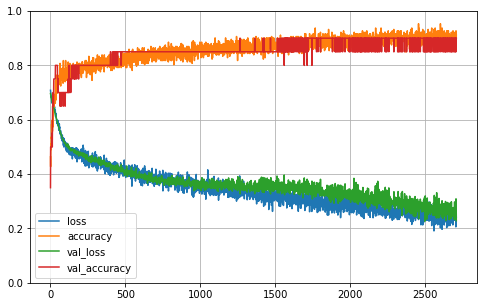

In [4]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_xlim(0,29)
plt.gca().set_ylim(0,1)
model.save('my_keras_model_aug_180_slowlearn.h5')

### Details about the model

In [5]:
model=keras.models.load_model('my_keras_model_aug_180_slowlearn.h5') 

model.summary()

for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(model.layers[i].get_config())
#info about optimizers
model.optimizer.get_config()      

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
activation (Activation)      (None, 87, 87, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0

{'name': 'Adam',
 'learning_rate': 4e-06,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

### Show the entire validation dataset

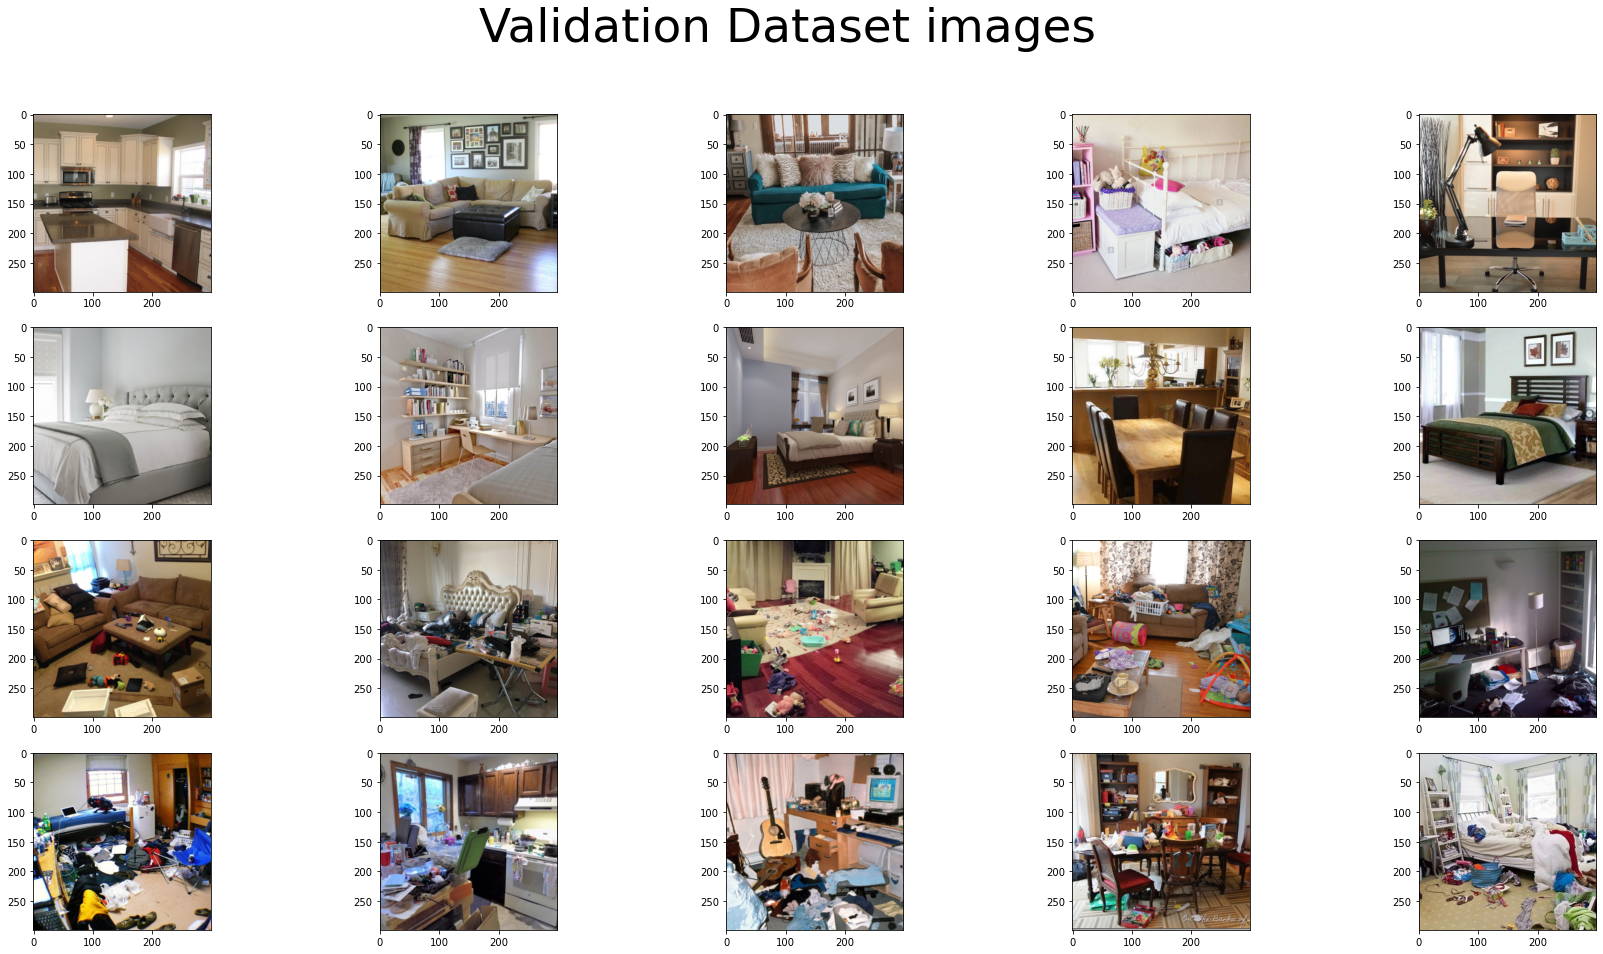

In [6]:
images=[] 
n_classes=2
for i,filenames in enumerate(os.listdir(VALIDATION_DIR)): 
    dir_fold=os.path.join(VALIDATION_DIR, filenames)
    class_images=[]
    for filename in os.listdir(dir_fold):
        img_path = os.path.join(dir_fold, filename)
        class_images.append(mpimg.imread(img_path))
    images.append(class_images)

#valid for balanced classes
columns = 5
fig,axes=plt.subplots(int(len(images)*len(images[0])/columns),columns,figsize=(30,15))
for i,ind in enumerate(images):
    fig.suptitle('Validation Dataset images',fontsize=47)
    for j, image in enumerate(ind):
        axes[int((i)*(len(ind)/columns)+(int(j/columns))),j % columns].imshow(image)

### Predict on test dataset

In [7]:
TEST_DIR = 'C:\\Users\diego\OneDrive\Desktop\DS\messy_nonmessy'
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,batch_size=40,
                                                             classes=['test'],
                                                              # don't generate labels
                                                              class_mode=None,
                                                              # don't shuffle
                                                              shuffle=False,
                                                             target_size=(size,size))

Found 10 images belonging to 1 classes.


In [8]:
files=test_generator.filenames
files    

['test\\0.png',
 'test\\1.png',
 'test\\2.png',
 'test\\3.png',
 'test\\4.png',
 'test\\5.png',
 'test\\6.png',
 'test\\7.png',
 'test\\8.png',
 'test\\9.png']

In [9]:
#test_generator.reset()
pred=model.predict_classes(test_generator)
predicted_class_indices=np.array(pred).reshape(len(pred))
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Filename,Predictions
0,test\0.png,messy_train
1,test\1.png,clean_train
2,test\2.png,messy_train
3,test\3.png,clean_train
4,test\4.png,messy_train
5,test\5.png,messy_train
6,test\6.png,clean_train
7,test\7.png,messy_train
8,test\8.png,messy_train
9,test\9.png,clean_train


In [10]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]